In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

2025-12-18 19:58:32.377313: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-18 19:58:32.411837: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-18 19:58:33.301948: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/leiyo/miniconda3/envs/ml_env/lib/python3.11/site-packages/kera

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

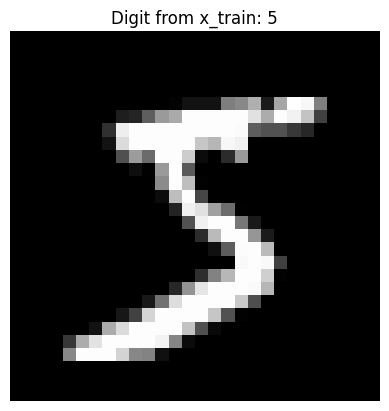

In [6]:
import matplotlib.pyplot as plt

# Select an index of the image you want to visualize
image_index = 0  # You can change this index to any value between 0 and the length of x_train or x_test

# Display the image
plt.imshow(x_train[image_index], cmap='gray')
plt.title('Digit from x_train: {}'.format(y_train[image_index]))
plt.axis('off')  # Turn off the axis
plt.show()

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Normalize the pixel values from a scale out of 255 to a scale out of 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [10]:
import os

os.environ["KERAS_BACKEND"] = "torch"

import keras

print(f"The current backend is: {keras.backend.backend()}")


if keras.backend.backend() != 'torch':
    raise RuntimeError("Make sure you have Keras 3.0+ (pip install --upgrade keras)")

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


input_shape = (28, 28, 1) 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape, data_format="channels_last"))
model.add(Conv2D(64, (3, 3), activation='relu', data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


The current backend is: torch


In [12]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
optimizer=tf.keras.optimizers.Adadelta(),
metrics=['accuracy'])

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss (before training):', score[0])
print('Test accuracy (before training):', score[1])

Test loss (before training): 2.2962608337402344
Test accuracy (before training): 0.11540000140666962


In [14]:
model.fit(
    x_train, y_train, 
    batch_size=128, 
    epochs=10, 
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1798 - loss: 2.2694 - val_accuracy: 0.4627 - val_loss: 2.2259
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3171 - loss: 2.1989 - val_accuracy: 0.5889 - val_loss: 2.1379
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4189 - loss: 2.1071 - val_accuracy: 0.6479 - val_loss: 2.0216
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4866 - loss: 1.9860 - val_accuracy: 0.6835 - val_loss: 1.8704
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5343 - loss: 1.8367 - val_accuracy: 0.7083 - val_loss: 1.6829
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5720 - loss: 1.6656 - val_accuracy: 0.7347 - val_loss: 1.4776
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6040 - loss: 1.4951 - val_accuracy: 0.7577 - val_loss: 1.2802
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6281 - loss: 1.3416 - val_accuracy: 0.

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8674994111061096
Test accuracy: 0.8011000156402588
